In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgb
from matplotlib.collections import PolyCollection

In [2]:
def add_lt(df,tz):
    df["lt"] = df.index.tz_localize(pytz.utc).tz_convert(pytz.timezone(tz))
    return df

def load_scws(rid,tz):
    print("loading "+rid+"...")
    df1 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_scw_envs_df.csv")
    df2 = pd.read_csv("/g/data/eg3/ab4502/ExtremeWind/points/"+rid+"_non_scw_envs_df.csv")
    
    df1["cluster_new"] = df1.cluster.map({0:2,1:0,2:1})
    df1 = df1.set_index(pd.DatetimeIndex(df1.dt_utc))
    df1["aspect_ratio"] = df1.major_axis_length / df1.minor_axis_length    
    
    df2["cluster_new"] = df2.cluster.map({0:2,1:0,2:1})
    df2 = df2.set_index(pd.DatetimeIndex(df2.dt_utc))
    df2["aspect_ratio"] = df2.major_axis_length / df2.minor_axis_length     
    
    df1["rid"] = rid
    df2["rid"] = rid

    
    return df1, df2

In [3]:
melb_scw, melb_null = load_scws("2",'Australia/Melbourne')
bris_scw, bris_null = load_scws("66",'Australia/Brisbane')
namoi_scw, namoi_null = load_scws("69",'Australia/Sydney')
perth_scw, perth_null = load_scws("70",'Australia/Perth')
syd_scw, syd_null = load_scws("71",'Australia/Sydney')

loading 2...
loading 66...
loading 69...
loading 70...
loading 71...


In [4]:
df_scw = pd.concat([melb_scw, perth_scw, syd_scw, namoi_scw, bris_scw],axis=0)
df_scw["scw"] = 1
df_all = pd.concat([df_scw,
                   melb_null, perth_null, syd_null, namoi_null, bris_null],axis=0).query("in10km==1")

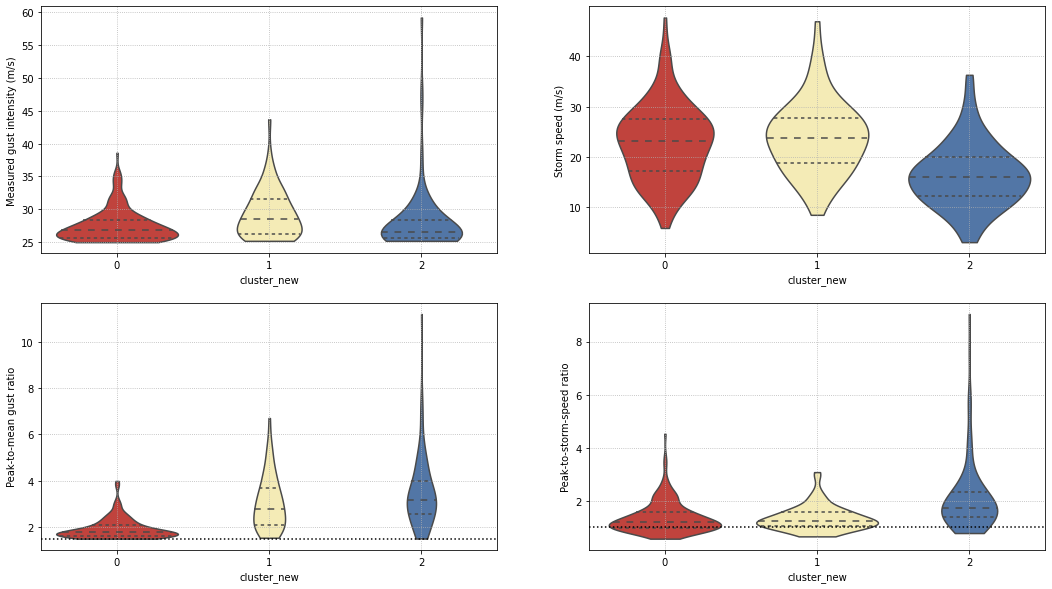

In [5]:
plt.figure(figsize=[18,10])

p=[plt.get_cmap("RdYlBu")(i) for i in [0.1,0.46,0.9]]


ax=plt.subplot(2,2,1)
sns.violinplot(data=df_scw,y="gust",x="cluster_new",cut=0,inner="quartile",palette=p)
plt.gca().grid(ls=":")
plt.ylabel("Measured gust intensity (m/s)")

ax=plt.subplot(2,2,2)
sns.violinplot(data=df_scw,y="speed",x="cluster_new",cut=0,inner="quartile",palette=p)
plt.gca().grid(ls=":")
plt.ylabel("Storm speed (m/s)")

ax=plt.subplot(2,2,3)
sns.violinplot(data=df_scw,y="wgr_4",x="cluster_new",cut=0,inner="quartile",palette=p)
plt.gca().grid(ls=":")
plt.ylabel("Peak-to-mean gust ratio")
plt.gca().axhline(1.5,ls=":",color="k")

ax=plt.subplot(2,2,4)
df_scw["wgr_sherb"] = df_scw["gust"] / df_scw["speed"]
sns.violinplot(data=df_scw,y="wgr_sherb",x="cluster_new",cut=0,inner="quartile",palette=p)
plt.gca().grid(ls=":")
plt.ylabel("Peak-to-storm-speed ratio")
plt.gca().axhline(1,ls=":",color="k")

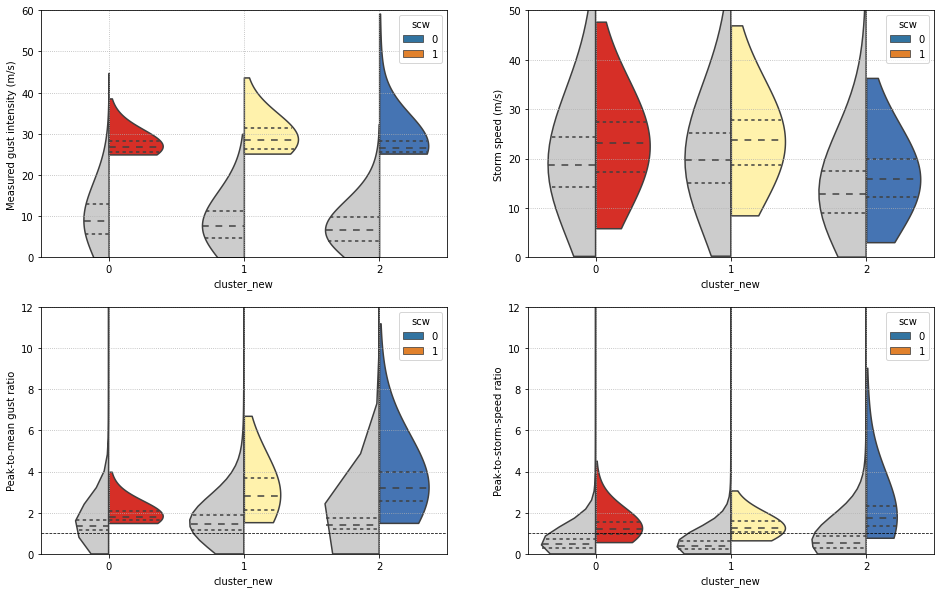

In [56]:
plt.figure(figsize=[16,10])
df_all["wgr_sherb"] = df_all["gust"] / df_all["speed"]

v0 = [0,0,0,0]
v1 = [60,50,12,12]
labels = ["Measured gust intensity (m/s)","Storm speed (m/s)","Peak-to-mean gust ratio","Peak-to-storm-speed ratio"]

cnt=0
for v in ["gust","speed","wgr_4","wgr_sherb"]:

    plt.subplot(2,2,cnt+1)
    sns.violinplot(data=df_all,y=v,x="cluster_new",cut=0,inner="quartile",hue="scw",split=True,bw=1.5)
    ax=plt.gca()
    colors = p
    for ind, violin in enumerate(ax.findobj(PolyCollection)):
        rgb = to_rgb(colors[ind // 2])
        if ind % 2 != 1:
            rgb = [0.8,0.8,0.8] 
        violin.set_facecolor(rgb)

    plt.gca().grid(ls=":")
    plt.gca().set_ylim([v0[cnt],v1[cnt]])
    
    if v in ["wgr_4","wgr_sherb"]:
        plt.gca().axhline(1,ls="--",color="k",lw=0.75)
    plt.ylabel(labels[cnt])
    
    cnt=cnt+1

Text(0.5, 1.0, 'Cluster 3 (high moisture)')

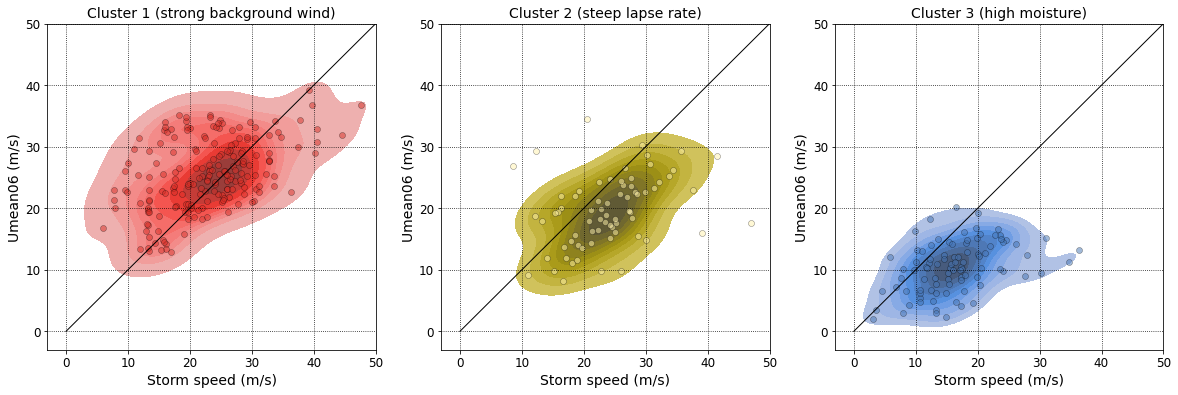

In [189]:
plt.figure(figsize=[20,6])

ax=plt.subplot(1,3,1)
sns.kdeplot(data=df_scw[df_scw.cluster_new==0],x="speed",y="Umean06",ax=ax,color=p[0],fill=True,thresh=0.025)
sns.scatterplot(data=df_scw[df_scw.cluster_new==0],x="speed",y="Umean06",ax=ax,color=p[0],edgecolor="k",alpha=0.5)
ax.plot([0,50],[0,50],color="k",ls="-",lw=1)
ax.set_xlim([-3,50])
ax.set_ylim([-3,50])
ax.grid(ls=":",color="k")
ax.set_xlabel("Storm speed (m/s)",size=14)
ax.set_ylabel("Umean06 (m/s)",size=14)
ax.tick_params(labelsize=12)
ax.set_title("Cluster 1 (strong background wind)",size=14)

ax=plt.subplot(1,3,2)
sns.kdeplot(data=df_scw[df_scw.cluster_new==1],x="speed",y="Umean06",ax=ax,color=p[1],fill=True,thresh=0.15)
sns.scatterplot(data=df_scw[df_scw.cluster_new==1],x="speed",y="Umean06",ax=ax,color=p[1],edgecolor="k",alpha=0.5)
ax.plot([0,50],[0,50],color="k",ls="-",lw=1)
ax.set_xlim([-3,50])
ax.set_ylim([-3,50])
ax.grid(ls=":",color="k")
ax.set_xlabel("Storm speed (m/s)",size=14)
ax.set_ylabel("Umean06 (m/s)",size=14)
ax.tick_params(labelsize=12)
ax.set_title("Cluster 2 (steep lapse rate)",size=14)

ax=plt.subplot(1,3,3)
sns.kdeplot(data=df_scw[df_scw.cluster_new==2],x="speed",y="Umean06",ax=ax,color=p[2],fill=True,thresh=0.1)
sns.scatterplot(data=df_scw[df_scw.cluster_new==2],x="speed",y="Umean06",ax=ax,color=p[2],edgecolor="k",alpha=0.5)
ax.plot([0,50],[0,50],color="k",ls="-",lw=1)
ax.set_xlim([-3,50])
ax.set_ylim([-3,50])
ax.grid(ls=":",color="k")
ax.set_xlabel("Storm speed (m/s)",size=14)
ax.set_ylabel("Umean06 (m/s)",size=14)
ax.tick_params(labelsize=12)
ax.set_title("Cluster 3 (high moisture)",size=14)


In [7]:
#RANK GUST DISTRIBUTION

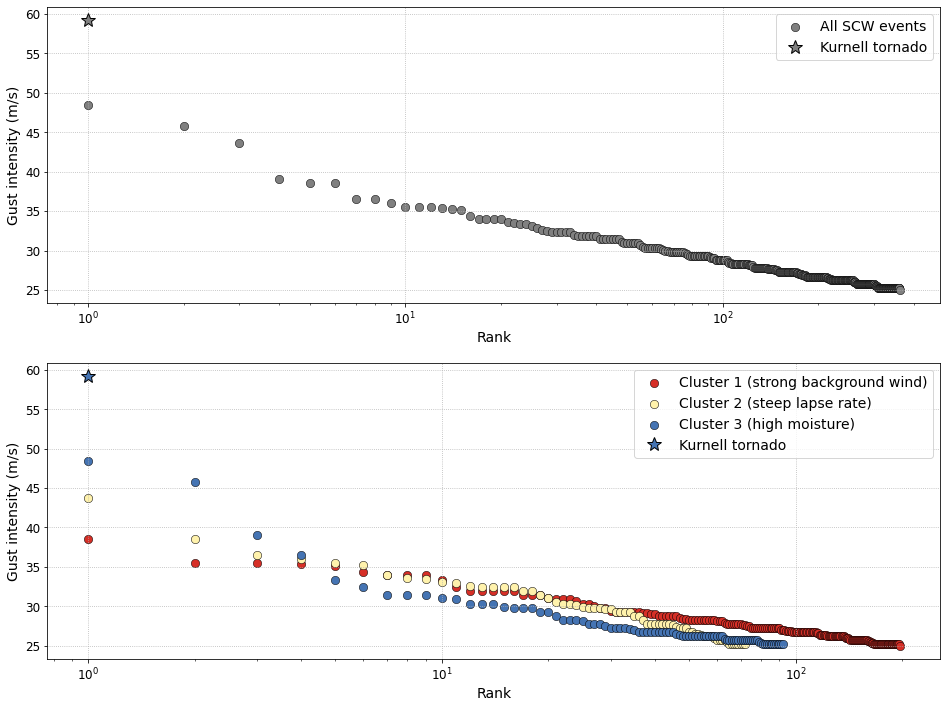

In [203]:
plt.figure(figsize=[16,12])


plt.subplot(2,1,1)
df_sorted = df_scw.sort_values("gust",ascending=False).iloc[1:]
df_sorted["rank"] = np.arange(1,df_sorted.shape[0]+1,1)
scatters.append(plt.scatter(x=df_sorted["rank"], y=df_sorted["gust"], color="grey", marker="o", edgecolor="k", linewidth=0.5, s=70))
plt.gca().grid(ls=":")

plt.xscale("log")
plt.yscale("linear")

plt.ylabel("Gust intensity (m/s)",size=14)
plt.xlabel("Rank",size=14)

plt.gca().tick_params(labelsize=12)
plt.plot(1,59.2,marker="*",ms=15,mec="k",color="grey",ls="none")
plt.legend(labels=["All SCW events","Kurnell tornado"], fontsize=14)

plt.subplot(2,1,2)
scatters=[]
for c in [0,1,2]:
    
    if c==2:
        df_sorted = df_scw[df_scw.cluster_new==c].sort_values("gust",ascending=False).iloc[1:]
        df_sorted["rank"] = np.arange(1,df_sorted.shape[0]+1,1)       
    else:
        df_sorted = df_scw[df_scw.cluster_new==c].sort_values("gust",ascending=False)
        df_sorted["rank"] = np.arange(1,df_sorted.shape[0]+1,1)

    scatters.append(plt.scatter(x=df_sorted["rank"], y=df_sorted["gust"], color=p[c], marker="o", edgecolor="k", linewidth=0.5, s=70))
    
plt.gca().grid(ls=":")

plt.xscale("log")
plt.yscale("linear")

plt.ylabel("Gust intensity (m/s)",size=14)
plt.xlabel("Rank",size=14)

plt.gca().tick_params(labelsize=12)

plt.plot(1,59.2,color=p[c],marker="*",ms=15,mec="k",ls="none")
plt.legend(labels=["Cluster 1 (strong background wind)","Cluster 2 (steep lapse rate)","Cluster 3 (high moisture)","Kurnell tornado"], fontsize=14)



# c=0; plt.gca().axhline(df_scw[df_scw.cluster_new==c].gust.median(),color=p[c],ls=":")
# c=1; plt.gca().axhline(df_scw[df_scw.cluster_new==c].gust.median(),color=p[c],ls=":")
# c=2; plt.gca().axhline(df_scw[df_scw.cluster_new==c].sort_values("gust",ascending=False).iloc[1:].gust.median(),color=p[c],ls=":")

# plt.gca().set_facecolor([0.9,0.9,0.9])

In [225]:
print("Eight out of nine top gusts are from clusters 1 and 2 (not including tornado)...")
df_scw.sort_values("gust",ascending=False).iloc[1:10][["rid","stn_id","gust","cluster_new","wgr_4","Lightning_observed","q"]]


Eight out of nine top gusts are from clusters 1 and 2 (not including tornado)...


,rid,stn_id,gust,cluster_new,wgr_4,Lightning_observed,q
dt_utc,,,,,,,
2011-01-11 03:49:00,66,40082,48.4,2,5.198934,49.0,Y
2010-12-14 07:03:00,69,55325,45.8,2,7.031902,0.0,Y
2016-11-13 07:31:00,66,40842,43.7,1,6.706381,56.0,Y
2014-11-27 06:29:00,66,40211,39.1,2,4.799623,257.0,Y
2009-04-14 19:15:00,2,90035,38.6,0,2.095794,2.0,Y
2016-12-08 09:39:00,69,55325,38.6,1,4.299991,11.0,Y
2011-02-04 08:46:00,2,87031,36.5,2,7.872938,10.0,Y
2013-10-13 07:40:00,69,61392,36.5,1,2.084379,23.0,Y
2014-12-16 05:56:00,69,61392,36.0,1,2.755423,4.0,Y


2011-01-11 03:49:00



## SUSPECT GUSTS

In [230]:
print("2011-01-11 03:49:00 (Brisbane)\n2010-12-14 07:03:00 (Namoi)\n")

#TODO: Write a script to loop over all the events, and plot AWS gust time series +/- 2 hours (to check it looks like a real event).

2011-01-11 03:49:00 (Brisbane)
2010-12-14 07:03:00 (Namoi)



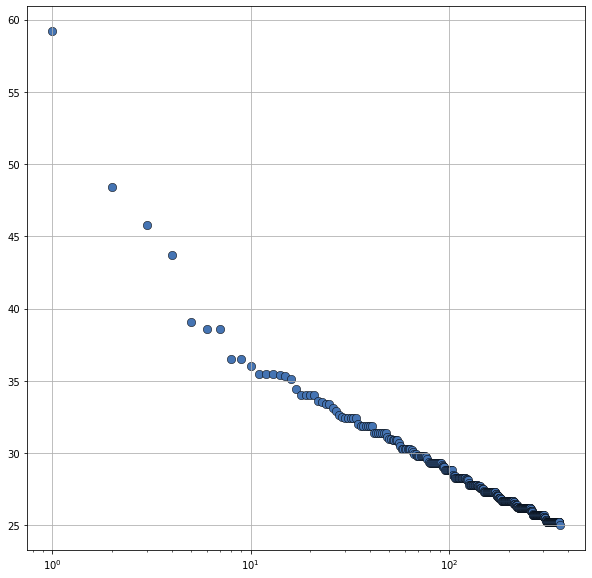

In [127]:
plt.figure(figsize=[10,10])
df_sorted = df_scw.sort_values("gust",ascending=False)
df_sorted["rank"] = np.arange(1,df_sorted.shape[0]+1,1)

scatters.append(plt.scatter(x=df_sorted["rank"], y=df_sorted["gust"], color=p[c], marker="o", edgecolor="k", linewidth=0.5, s=70))

plt.xscale("log")

plt.gca().grid(":")